## Imports and data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/spotify_dataset.csv', parse_dates=[3])

In [4]:
data

,name,album,artist,release_date,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,target
0,Corner Man - Explicit Album Version,Last 2 Walk,Three 6 Mafia,2008-06-21,20,187480,2,1,4,0.080300,0.750,0.783,0.000000,0.0786,-5.480,0.0720,0.274,157.057,0.0
1,Old Judge Jones,Say No More,Les Dudek,1977-01-01,29,278800,8,1,4,0.094400,0.629,0.647,0.004810,0.2470,-9.260,0.0343,0.652,135.866,0.0
2,Endless Fantasy,Endless Fantasy,Anamanaguchi,2013-05-14,43,357785,8,1,3,0.000315,0.420,0.731,0.025200,0.2210,-4.027,0.1030,0.293,126.692,0.0
3,Hope Has a Place,The Memory of Trees,Enya,1995-11-20,35,288640,11,1,4,0.954000,0.186,0.127,0.092700,0.1090,-18.247,0.0383,0.071,70.883,0.0
4,Put the Needle on It - Radio Version,Neon Nights (Deluxe Version),Dannii Minogue,2003-01-01,37,204000,6,0,4,0.014100,0.810,0.618,0.035800,0.0970,-8.194,0.0651,0.776,120.021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209310,What You Get Is What You See - Live,Tina Live in Europe,Tina Turner,1988-03-16,32,334040,5,1,4,0.006120,0.424,0.906,0.001860,0.9880,-10.985,0.0610,0.676,168.447,1.0
209311,What You Waiting For?,Love Angel Music Baby (Deluxe Version),Gwen Stefani,2004-11-23,54,221227,5,1,4,0.050900,0.676,0.948,0.000008,0.3840,-2.557,0.0628,0.731,136.027,1.0
209312,Say What You Want,The Greatest Hits,Texas,2000-10-23,44,230547,4,1,4,0.176000,0.633,0.824,0.000000,0.1150,-6.015,0.0753,0.777,95.893,1.0
209313,What's a Guy Gotta Do,What's a Guy Gotta Do,John McNicholl,2005-09-02,17,147987,1,1,4,0.592000,0.661,0.778,0.000000,0.0897,-7.352,0.0318,0.968,169.910,1.0


In [5]:
data[data.artist.isna()]

,name,album,artist,release_date,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,target
75833,Glade Jul,Deilig Er Jorden,NaN,1988-01-01,0,263314,1,1,3,0.992,0.175,0.109,0.00452,0.0981,-20.95,0.0433,0.0731,77.29,0.0


In [6]:
data.isna().sum()

name                0
album               0
artist              1
release_date        0
popularity          0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
target              0
dtype: int64

In [7]:
data.artist = data.artist.fillna('Sissel Kyrkjebo')

In [8]:
data.isna().sum()

name                0
album               0
artist              0
release_date        0
popularity          0
duration_ms         0
key                 0
mode                0
time_signature      0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
valence             0
tempo               0
target              0
dtype: int64

In [9]:
data['year'] = data.release_date.apply(lambda x: x.year)

In [10]:
data.year.value_counts()

2018    3675
2017    3656
2016    3587
2010    3575
2009    3540
        ... 
1958    3192
1960    3192
1961    3190
2019     454
1957      16
Name: year, Length: 63, dtype: int64

In [11]:
data.duplicated().sum()

19

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
X = data.drop('target', axis=1)

In [14]:
X.drop_duplicates(inplace=True)

In [15]:
X.shape

(209296, 19)

In [16]:
data = pd.concat([X, data.target], axis=1)

## Exploratory Data Analysis

### Data and features description

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209296 entries, 0 to 209314
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   name              209296 non-null  object        
 1   album             209296 non-null  object        
 2   artist            209296 non-null  object        
 3   release_date      209296 non-null  datetime64[ns]
 4   popularity        209296 non-null  int64         
 5   duration_ms       209296 non-null  int64         
 6   key               209296 non-null  int64         
 7   mode              209296 non-null  int64         
 8   time_signature    209296 non-null  int64         
 9   acousticness      209296 non-null  float64       
 10  danceability      209296 non-null  float64       
 11  energy            209296 non-null  float64       
 12  instrumentalness  209296 non-null  float64       
 13  liveness          209296 non-null  float64       
 14  loud

In [18]:
data.describe()

,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year,target
count,209296.000000,2.092960e+05,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000,209296.000000
mean,26.059523,2.369157e+05,5.203530,0.707410,3.860408,0.429933,0.535897,0.532099,0.151005,0.216943,-11.006869,0.091644,0.530124,118.235498,1988.490573,0.085229
std,17.875334,1.330489e+05,3.521244,0.454953,0.486624,0.352846,0.179274,0.263163,0.300544,0.195757,5.750141,0.145472,0.269780,30.303528,17.620014,0.279222
min,0.000000,4.756000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,1957.000000,0.000000
25%,11.000000,1.714435e+05,2.000000,0.000000,4.000000,0.069900,0.413000,0.324000,0.000000,0.096500,-13.837000,0.034200,0.311000,95.017000,1973.000000,0.000000
50%,25.000000,2.166400e+05,5.000000,1.000000,4.000000,0.381000,0.547000,0.543000,0.000115,0.135000,-9.931000,0.044000,0.540000,115.993000,1989.000000,0.000000
75%,39.000000,2.707070e+05,8.000000,1.000000,4.000000,0.775000,0.668000,0.748000,0.055900,0.276000,-6.801000,0.073600,0.759000,136.849250,2004.000000,0.000000
max,96.000000,4.972800e+06,11.000000,1.000000,5.000000,0.996000,0.988000,1.000000,1.000000,1.000000,4.615000,0.971000,1.000000,243.507000,2019.000000,1.000000


In [19]:
data.target.value_counts('normalize')

0.0    0.914771
1.0    0.085229
Name: target, dtype: float64

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [20]:
audio_features = data.columns[6:-2]

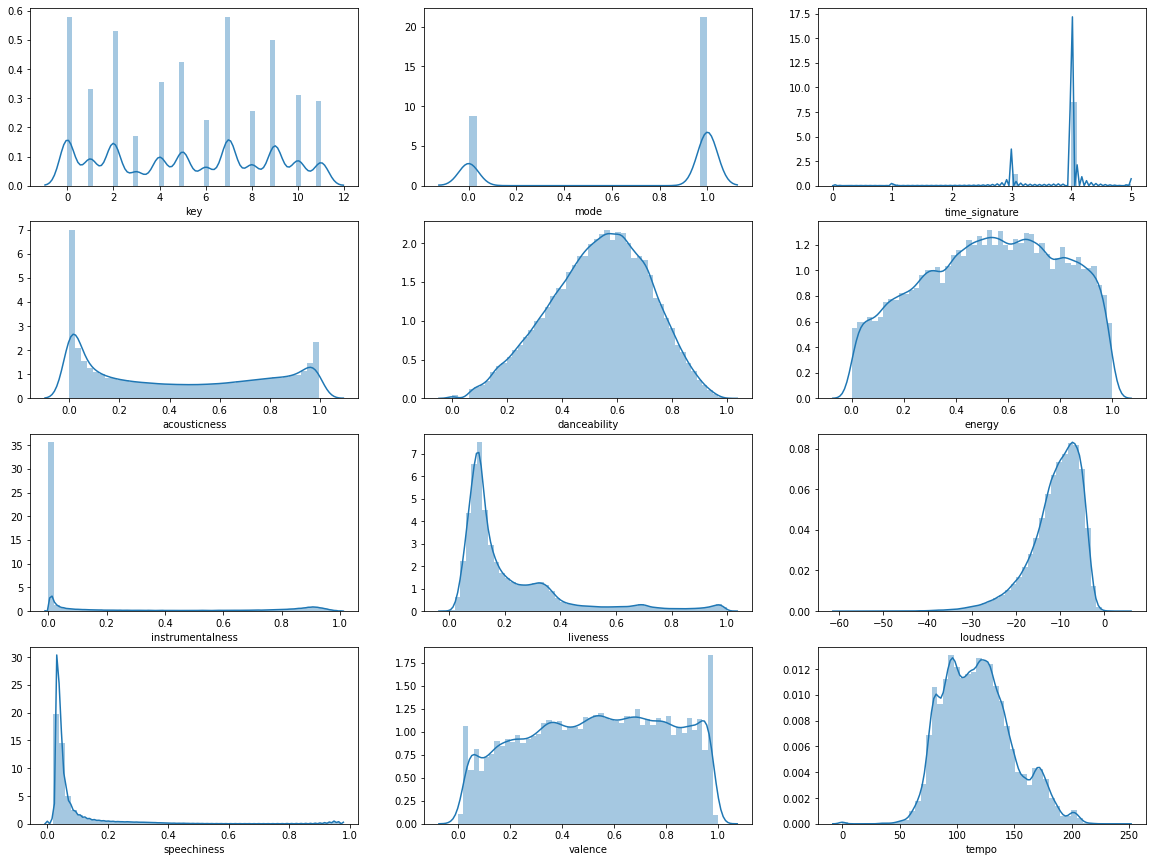

In [21]:
plt.figure(figsize=(20,15))
ax =[]

for i in range(0,12):
    ax.append(plt.subplot(4,3,i+1))
    sns.distplot(data[audio_features[i]])

plt.show()

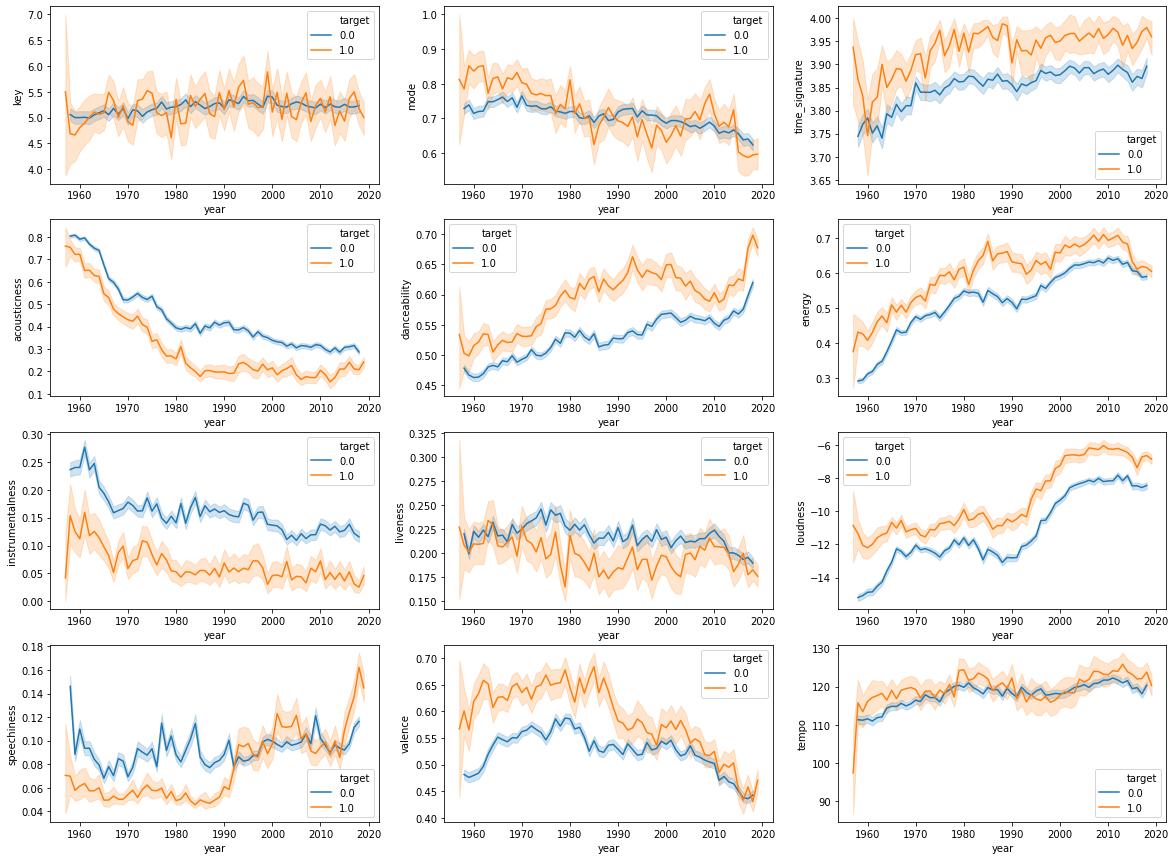

In [22]:
plt.figure(figsize=(20,15))
ax =[]

for i in range(0,12):
    ax.append(plt.subplot(4,3,i+1))
    sns.lineplot(x=data.year, y=data[audio_features[i]], hue=data.target)

plt.show()

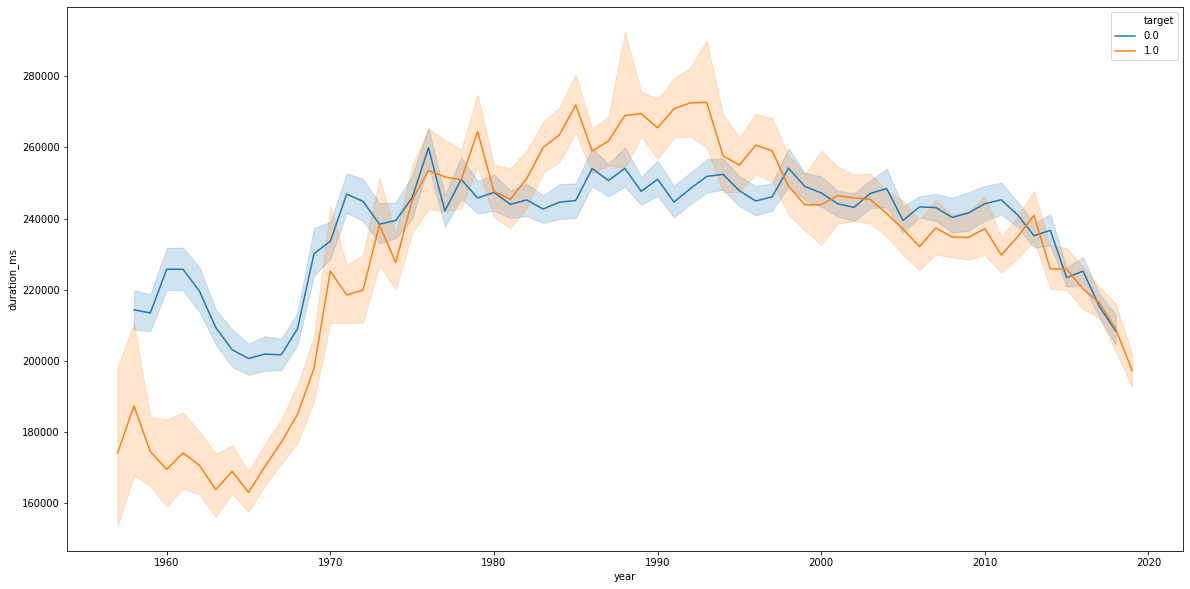

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x=data.year, y=data['duration_ms'], hue=data.target)
plt.show()

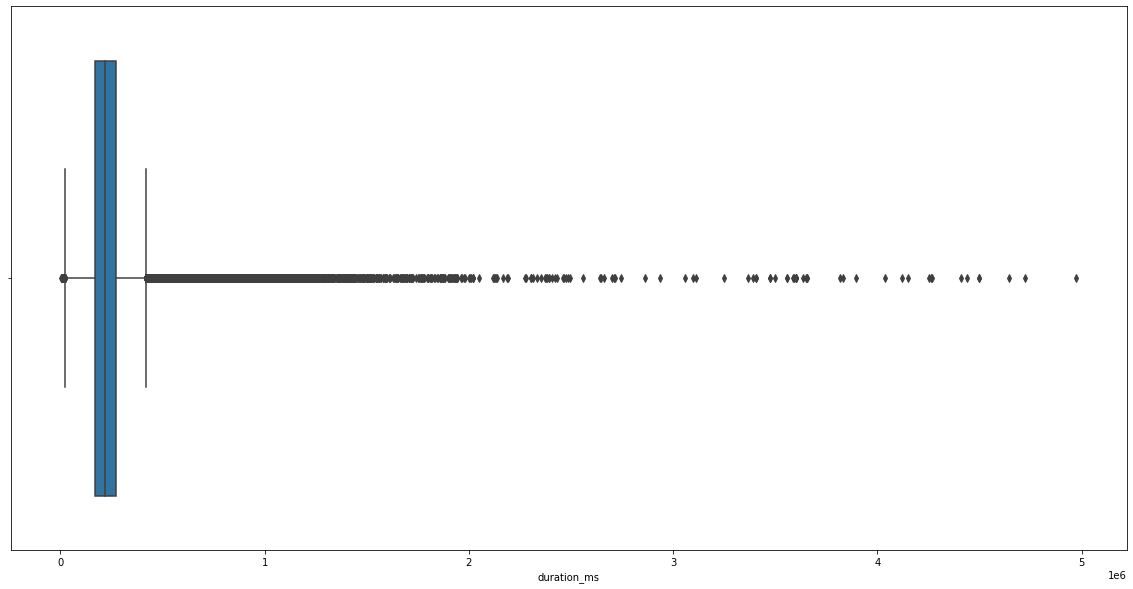

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data['duration_ms'])
plt.show()

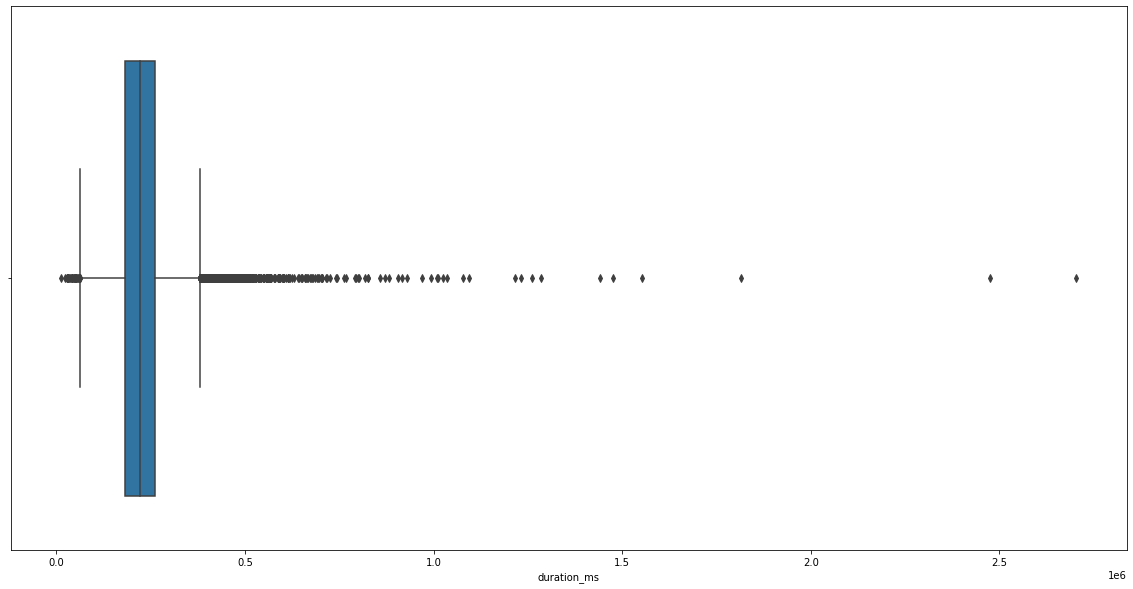

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(data[data.target==1]['duration_ms'])
plt.show()

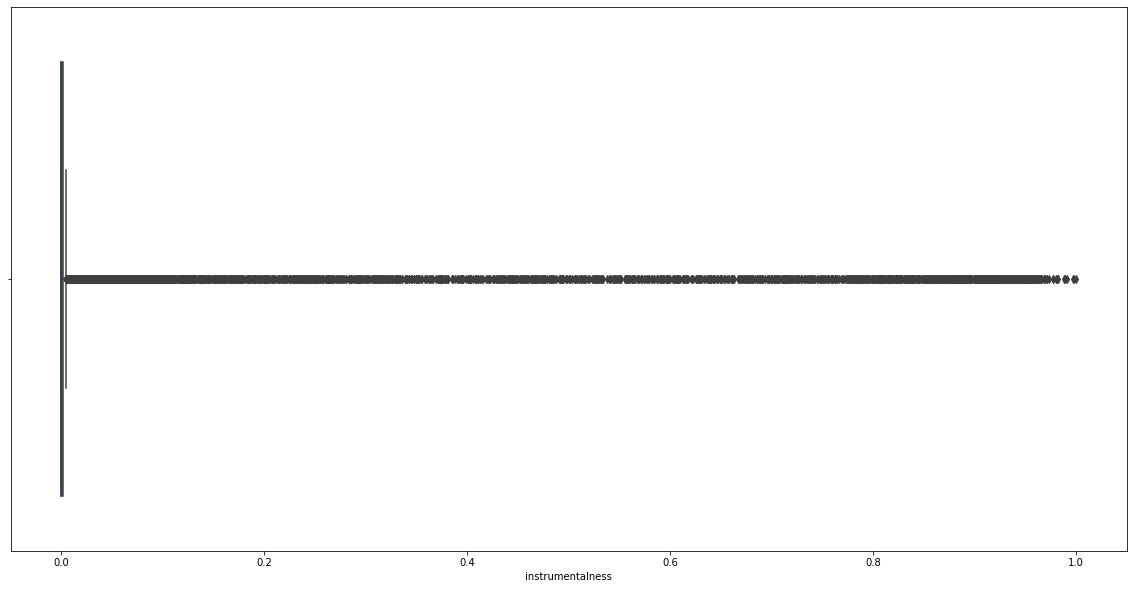

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data[data.target==1]['instrumentalness'])
plt.show()

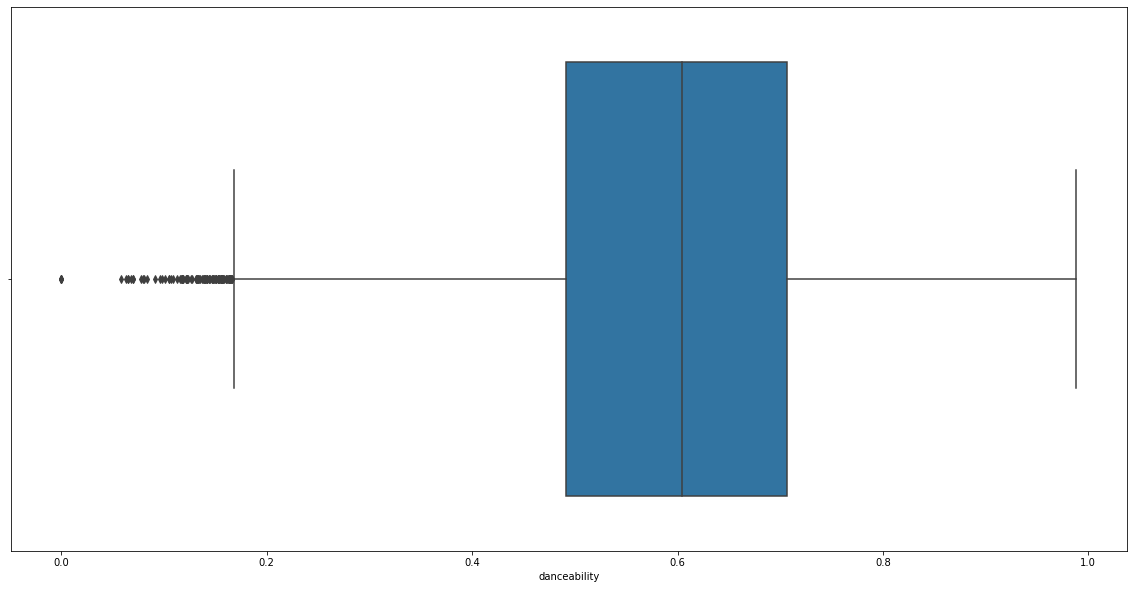

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(data[data.target==1]['danceability'])
plt.show()

In [28]:
data.artist.value_counts().head(100)

Various Artists            9018
Johann Sebastian Bach      1240
Wolfgang Amadeus Mozart    1039
Ludwig van Beethoven        799
Johnny Cash                 573
                           ... 
The Supremes                140
2Pac                        139
Chicago                     138
B.B. King                   138
Barbra Streisand            137
Name: artist, Length: 100, dtype: int64

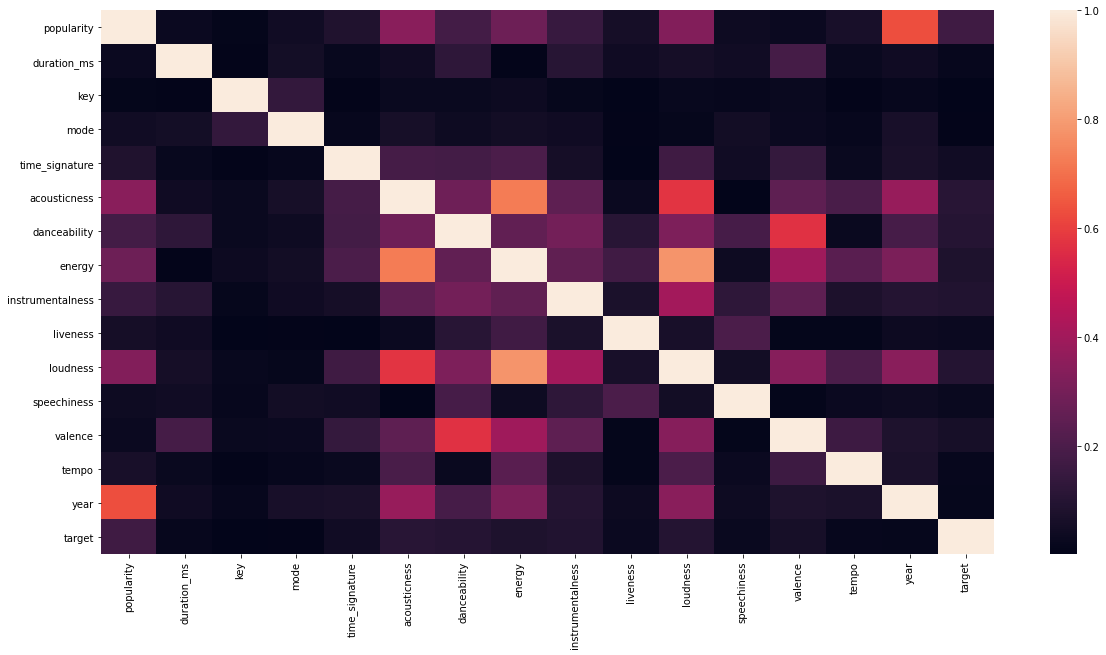

In [29]:
corr = data.corr()

plt.figure(figsize=(20,10))
sns.heatmap(abs(corr))
plt.show()

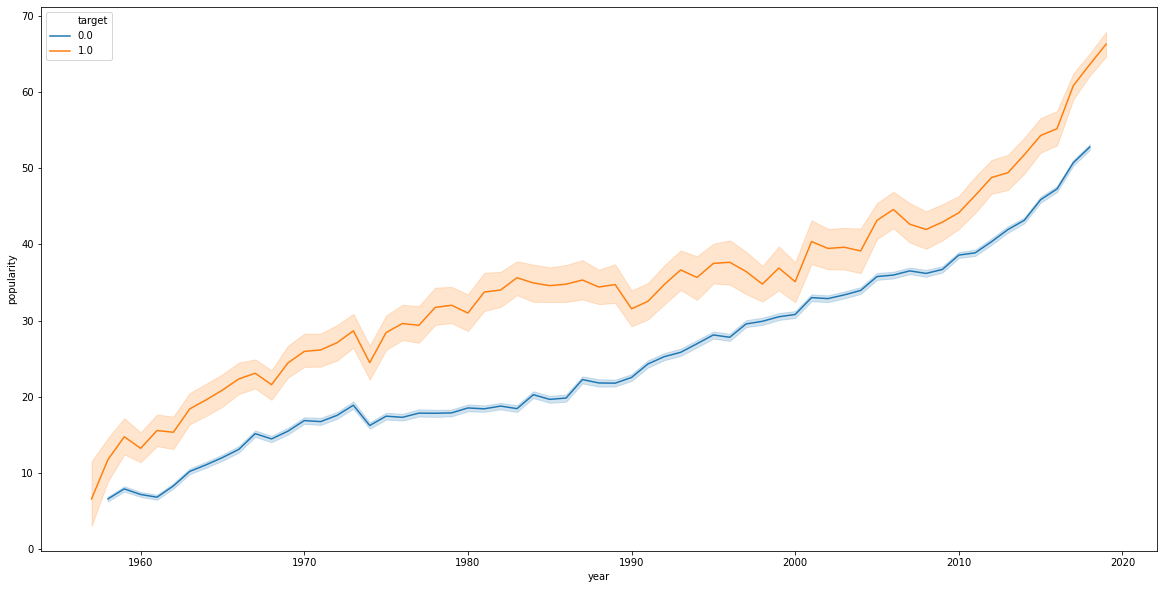

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(x=data.year, y=data['popularity'],hue=data.target)
plt.show()

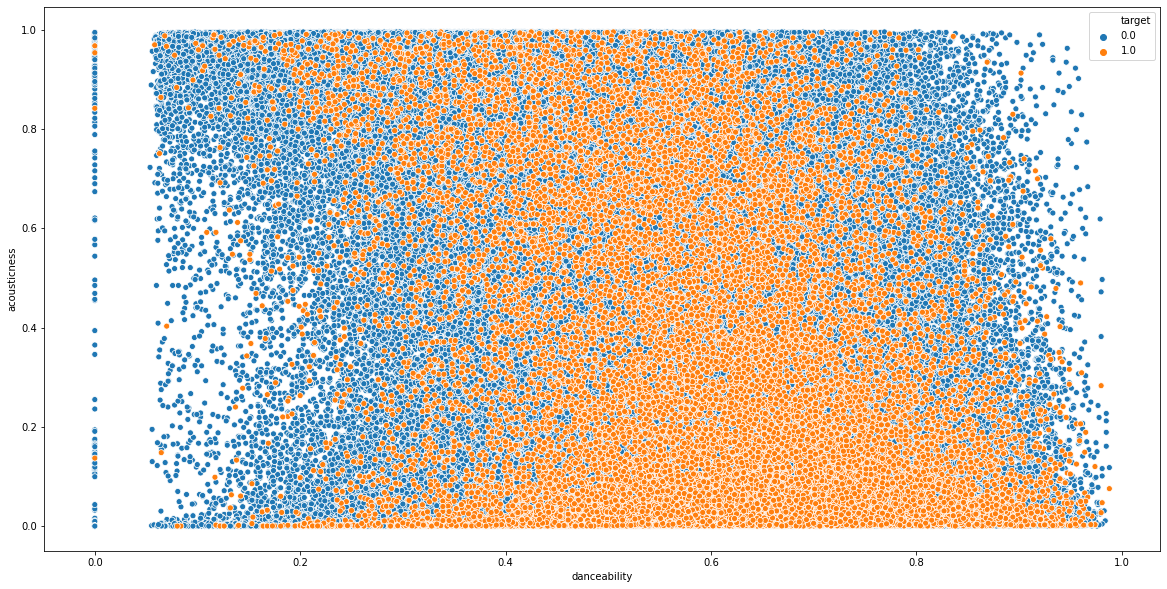

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=data.danceability, y=data.acousticness, hue=data.target)
plt.show()

## Feature cleaning and engineering

In [32]:
data_5818 = data[(data.year != 1957) & (data.year != 2019)]

We will make the following things on the data:
- Create an artist_score column in which we have how many hits did this artist make previous to this year? We will then have to drop all songs from 1958 as every_artist_score will be 0 for this year because we do not have the information of hits before 1958.
- Drop popularity feature cause we want to predict if a song will be a hit even before it was listened to.
- Dummify years and key columns.
- Create bins for duration.

### Create an artist_score column

In [33]:
years = np.arange(1958,2019)

In [34]:
map_artscore = dict()
for y in years:
    map_artscore[y] = dict(data_5818[(data_5818.year < y) & (data_5818.target==1)].artist.value_counts())

In [35]:
for y in years:
    data_5818.loc[data_5818.year==y,'artist_score'] = data_5818.loc[data_5818.year==y,:].artist.apply(lambda x: map_artscore[y][x] if x in map_artscore[y] and x != 'Various Artists' else 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
data_5818.to_csv('dataset_5818_artscore.csv', index=False)

### Drop popularity feature as well as name, album and artist

In [37]:
data_new = data_5818.drop(['name', 'album', 'artist', 'popularity', 'release_date'], axis=1)

In [38]:
data_new

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year,target,artist_score
0,187480,2,1,4,0.080300,0.750,0.783,0.000000,0.0786,-5.480,0.0720,0.274,157.057,2008,0.0,4.0
1,278800,8,1,4,0.094400,0.629,0.647,0.004810,0.2470,-9.260,0.0343,0.652,135.866,1977,0.0,0.0
2,357785,8,1,3,0.000315,0.420,0.731,0.025200,0.2210,-4.027,0.1030,0.293,126.692,2013,0.0,0.0
3,288640,11,1,4,0.954000,0.186,0.127,0.092700,0.1090,-18.247,0.0383,0.071,70.883,1995,0.0,2.0
4,204000,6,0,4,0.014100,0.810,0.618,0.035800,0.0970,-8.194,0.0651,0.776,120.021,2003,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209310,334040,5,1,4,0.006120,0.424,0.906,0.001860,0.9880,-10.985,0.0610,0.676,168.447,1988,1.0,7.0
209311,221227,5,1,4,0.050900,0.676,0.948,0.000008,0.3840,-2.557,0.0628,0.731,136.027,2004,1.0,0.0
209312,230547,4,1,4,0.176000,0.633,0.824,0.000000,0.1150,-6.015,0.0753,0.777,95.893,2000,1.0,1.0
209313,147987,1,1,4,0.592000,0.661,0.778,0.000000,0.0897,-7.352,0.0318,0.968,169.910,2005,1.0,0.0


### Dummify 'year' and 'key' columns

In [39]:
to_encode=['year', 'key', 'mode']

We will pass these columns through a OneHot Encoder in our models' pipelines.

### Create bins for duration

In [40]:
to_bin=['duration_ms']

We will use a KBinsDiscretizer in our models' pipelines with a quantile strategy of 5 bins and a onehot encoding.

# Training with original data

In [40]:
X = data_5818.drop(['name', 'artist', 'album', 'release_date', 'target'], axis=1)
y = data_5818.target

In [41]:
features = ['time_signature', 'acousticness', 'danceability', 'instrumentalness', 'loudness', 'valence']

In [42]:
X = X[features]

#### SMOTE

In [43]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
oversampler = SMOTE(sampling_strategy=1, random_state=42, k_neighbors=20, n_jobs=-1)

#### SPLIT

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

ValueError: ignored

In [ ]:
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

## Classification Models

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
pipe_logr = Pipeline([('scaler', StandardScaler()), ('estimator', LogisticRegression(penalty='l2', class_weight='balanced'))])

In [ ]:
pipe_logr.fit(X_train, y_train)

In [ ]:
y_pred_logr = pipe_logr.predict(X_test)

In [ ]:
y_pred_train_logr = pipe_logr.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred_logr))

In [ ]:
print(classification_report(y_train, y_pred_train_logr))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe_rfc = Pipeline([('scaler', StandardScaler()), ('estimator', RandomForestClassifier(max_depth=10, class_weight='balanced', n_jobs=-1))])

In [ ]:
pipe_rfc.fit(X_train, y_train)

In [ ]:
y_pred_rfc = pipe_rfc.predict(X_test)

In [ ]:
y_pred_prob_rfc = pipe_rfc.predict_proba(X_test)

In [ ]:
y_pred_train_rfc = pipe_rfc.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_rfc))

In [ ]:
print(classification_report(y_train, y_pred_train_rfc))

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
pipe_lgbm = Pipeline([('scaler', StandardScaler()), ('estimator', LGBMClassifier(max_depth=10, class_weight={0:10, 1:90}, n_jobs=-1, random_state=42))])

In [ ]:
pipe_lgbm.fit(X_train, y_train)

In [ ]:
y_pred_lgbm = pipe_lgbm.predict(X_test)

In [ ]:
y_pred_prob_lgbm = pipe_lgbm.predict_proba(X_test)

In [ ]:
y_pred_train_lgbm = pipe_lgbm.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_lgbm))

In [ ]:
print(classification_report(y_train, y_pred_train_lgbm))

### LightGBM with oversampling

In [ ]:
pipe_lgbm_over = Pipeline([('scaler', StandardScaler()), ('estimator', LGBMClassifier(max_depth=10, n_jobs=-1, random_state=42))])

In [ ]:
pipe_lgbm_over.fit(X_train_over, y_train_over)

In [ ]:
y_pred = pipe_lgbm_over.predict(X_test)

In [ ]:
y_pred_train = pipe_lgbm_over.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(classification_report(y_train, y_pred_train))

## Anomaly Detection

### Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
pipe_elliptic = Pipeline([('scaler', StandardScaler()), ('envelope', EllipticEnvelope(assume_centered=True, contamination=0.08, random_state=42, support_fraction=10000))])

In [ ]:
pipe_elliptic.fit(X_train)

In [ ]:
y_pred = pipe_elliptic.predict(X_test)

In [ ]:
y_pred[y_pred==1] = 0

In [ ]:
y_pred[y_pred==-1] = 1

In [ ]:
print(classification_report(y_test, y_pred))

### Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
pipe_isof = Pipeline([('scaler', StandardScaler()), ('estimator', IsolationForest(n_estimators=1000, max_samples=2000, contamination=0.08, n_jobs=-1))])

In [ ]:
pipe_isof.fit(X_train)

In [ ]:
y_pred = pipe_isof.predict(X_test)

In [ ]:
y_pred[y_pred==1] = 0

In [ ]:
y_pred[y_pred==-1] = 1

In [ ]:
print(classification_report(y_test, y_pred))

## Deep Learning

### Multi-Layer Perceptron

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train_mlp, X_val_mlp, y_train_mlp, y_val_mlp = train_test_split(X_train_sc, y_train, test_size=0.2, stratify=y_train)

In [ ]:
def multilayer_perceptron(input_dim):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid'))
    
    return model

In [ ]:
model = multilayer_perceptron(len(X_train.columns))

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, epochs=20, batch_size=100, class_weight={0:8, 1:92}, validation_data=(X_val_mlp, y_val_mlp))

In [ ]:
y_pred_prob_mlp = model.predict(X_test_sc)

In [ ]:
y_pred_prob_mlp[y_test == 1].mean()

In [ ]:
y_pred_prob_mlp[y_pred_prob_mlp<0.6]=0

In [ ]:
y_pred_prob_mlp[y_pred_prob_mlp>=0.6]=1

In [ ]:
print(classification_report(y_test, y_pred_prob_mlp))

In [ ]:
y_pred_prob_mlp = model.predict(X_test_sc)

In [ ]:
y_pred_prob_lgbm

In [ ]:
y_pred_prob_mlp[0][0]

In [ ]:
y_pred_vot_proba = [max(y_pred_prob_lgbm[i,1], y_pred_prob_mlp[i][0], y_pred_prob_rfc[i,1]) for i in range(len(y_test))]

In [ ]:
y_pred_vot_proba

In [ ]:
y_pred_vot = [round(proba) for proba in y_pred_vot_proba]

In [ ]:
print(classification_report(y_test, y_pred_vot))

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vot_clf = VotingClassifier(estimators=[('logr', pipe_logr), ('rf', pipe_rfc), ('lgbm', pipe_lgbm)], voting='hard')

In [ ]:
vot_clf.fit(X_train, y_train)

In [ ]:
y_pred_vot = vot_clf.predict(X_test)

In [ ]:
y_pred_train_vot = vot_clf.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_vot))

In [ ]:
print(classification_report(y_train, y_pred_train_vot))

# Training with engineered data

In [41]:
X = data_new[data_new.year>1958].drop('target', axis=1)
y = data_new[data_new.year>1958].target

In [42]:
X

,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,year,artist_score
0,187480,2,1,4,0.080300,0.750,0.783,0.000000,0.0786,-5.480,0.0720,0.274,157.057,2008,4.0
1,278800,8,1,4,0.094400,0.629,0.647,0.004810,0.2470,-9.260,0.0343,0.652,135.866,1977,0.0
2,357785,8,1,3,0.000315,0.420,0.731,0.025200,0.2210,-4.027,0.1030,0.293,126.692,2013,0.0
3,288640,11,1,4,0.954000,0.186,0.127,0.092700,0.1090,-18.247,0.0383,0.071,70.883,1995,2.0
4,204000,6,0,4,0.014100,0.810,0.618,0.035800,0.0970,-8.194,0.0651,0.776,120.021,2003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209310,334040,5,1,4,0.006120,0.424,0.906,0.001860,0.9880,-10.985,0.0610,0.676,168.447,1988,7.0
209311,221227,5,1,4,0.050900,0.676,0.948,0.000008,0.3840,-2.557,0.0628,0.731,136.027,2004,0.0
209312,230547,4,1,4,0.176000,0.633,0.824,0.000000,0.1150,-6.015,0.0753,0.777,95.893,2000,1.0
209313,147987,1,1,4,0.592000,0.661,0.778,0.000000,0.0897,-7.352,0.0318,0.968,169.910,2005,0.0


In [43]:
num_cols = ['time_signature', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo', 'artist_score']
num_cols

['time_signature',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'tempo',
 'artist_score']

In [44]:
to_encode

['year', 'key', 'mode']

In [45]:
to_bin

['duration_ms']

### Column Transformer

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [47]:
transformer = ColumnTransformer([('scaler', StandardScaler(), num_cols),
                                 ("discretizer", KBinsDiscretizer(), to_bin),
                                 ("encoder", OneHotEncoder(drop='first'), to_encode)],
                                n_jobs=-1, verbose=1)

### Split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [49]:
X_train_transformed = transformer.fit_transform(X_train)

In [50]:
other_cols = [col for col in num_cols if col not in to_bin+to_encode]
bin_edges = transformer.transformers_[1][1].bin_edges_[0]
onehot_columns = transformer.transformers_[2][1].get_feature_names(to_encode)

In [51]:
features_transformed = other_cols+\
[f'Duration:[{bin_edges[i]}:{bin_edges[i+1]}]' for i in range(len(bin_edges)-1)]+\
list(onehot_columns)

In [52]:
X_train_transformed = pd.DataFrame(X_train_transformed.todense(), columns=features_transformed)

In [53]:
X_train_transformed

,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,artist_score,Duration:[4756.0:161973.0],Duration:[161973.0:199933.0],Duration:[199933.0:235933.0],Duration:[235933.0:287907.0],Duration:[287907.0:4972800.0],year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,...,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,-5.924832,-0.609746,0.689337,-0.840251,-0.493443,-0.766564,0.144241,-0.289230,-0.873724,-1.530132,0.365279,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.284509,-1.196662,0.622422,1.656130,-0.500165,0.507672,1.334771,-0.006850,1.209321,0.846384,0.365279,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.284509,1.566863,0.343608,-1.491978,-0.500165,-0.438467,-0.686999,-0.020163,-0.154666,-1.099776,-0.349870,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.284509,-0.991862,-1.095069,0.459392,-0.190814,-0.474075,-0.287361,-0.391531,1.153724,0.777481,-0.349870,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-5.924832,1.239660,0.962574,-0.794515,-0.500165,1.336816,-0.109375,5.306520,0.801608,-1.259273,-0.349870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164503,0.284509,1.017732,-0.370154,-0.943155,-0.500165,3.249442,-0.471111,-0.373313,-0.818127,0.868207,-0.171083,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
164504,0.284509,1.390458,-0.994696,-1.587259,-0.463043,-0.296038,-1.336236,-0.410450,-0.758823,-1.274889,-0.349870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
164505,-1.785271,1.578244,-1.329273,-1.457676,0.978031,0.645015,-0.708832,-0.3719

### Logistic Regression

In [ ]:
pipe_logr = Pipeline([('column_transformer', transformer), ('estimator', LogisticRegression(class_weight='balanced', random_state=42))])

In [ ]:
pipe_logr.fit(X_train, y_train)

In [ ]:
y_pred = pipe_logr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
pipe_logr.steps[0][1]

In [ ]:
y_pred_probas = pipe_logr.predict_proba(X_test)

In [ ]:
y_pred_probas[y_test==1]

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Probability of being a hit')
plt.hist(y_pred_probas[y_test==0,1], alpha=0.5, label='Non-hit')
plt.hist(y_pred_probas[y_test==1,1], alpha=0.5, label='Hit')
plt.legend()
plt.show()

### LightBGM

In [54]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [55]:
pipe_lgbm = Pipeline([('column_transformer', transformer), ('estimator', LGBMClassifier(max_depth=10, is_unbalance=True, random_state=42))])

In [56]:
pipe_lgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column_transformer',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['time_signature',
                                                   'acousticness',
                                                   'danceability', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'valence',
                       

In [57]:
y_pred_lgbm = pipe_lgbm.predict(X_test)
y_pred_train_lgbm = pipe_lgbm.predict(X_train)

In [58]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

         0.0       0.96      0.68      0.79     37678
         1.0       0.16      0.69      0.26      3449

    accuracy                           0.68     41127
   macro avg       0.56      0.68      0.53     41127
weighted avg       0.89      0.68      0.75     41127



In [59]:
print(classification_report(y_train, y_pred_train_lgbm))

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80    150710
         1.0       0.18      0.76      0.29     13798

    accuracy                           0.69    164508
   macro avg       0.57      0.72      0.54    164508
weighted avg       0.90      0.69      0.76    164508



In [62]:
y_pred = pipe_lgbm.predict(X_test)

In [63]:
y_pred_probas = pipe_lgbm.predict_proba(X_test)

In [64]:
y_pred[:] = 0

In [65]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [66]:
y_pred[y_pred_probas[:, 1]>0.65] = 1

In [67]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     37678
         1.0       0.23      0.38      0.29      3449

    accuracy                           0.84     41127
   macro avg       0.59      0.63      0.60     41127
weighted avg       0.88      0.84      0.86     41127



In [ ]:
plt.figure(figsize=(20,10))
plt.title('Probability of being a hit')
plt.hist(y_pred_probas[y_test==0,1], alpha=0.5, label='Non-hit')
plt.hist(y_pred_probas[y_test==1,1], alpha=0.5, label='Hit')
plt.legend()
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid_lgbm = {'estimator__num_leaves':[100, 200, 300],
                   'estimator__max_depth':[9, 10, 11],
                   'estimator__n_estimators':[300, 500, 700]}

In [71]:
grid_lgbm = GridSearchCV(pipe_lgbm, param_grid=param_grid_lgbm, n_jobs=-1, scoring='f1_macro')

In [72]:
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('column_transformer',
                                        ColumnTransformer(n_jobs=-1,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('scaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['time_signature',
                                                               

In [73]:
grid_lgbm.best_params_

{'estimator__max_depth': 11,
 'estimator__n_estimators': 300,
 'estimator__num_leaves': 200}

In [74]:
best_lgbm = grid_lgbm.best_estimator_

In [75]:
y_pred_probas = best_lgbm.predict_proba(X_test)

In [102]:
y_pred[:] = 0

In [103]:
y_pred[y_pred_probas[:, 1]>0.63] = 1

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90     37678
         1.0       0.22      0.43      0.29      3449

    accuracy                           0.83     41127
   macro avg       0.58      0.65      0.60     41127
weighted avg       0.88      0.83      0.85     41127



### Random Forest

In [ ]:
pipe_rfc = Pipeline([('column_transformer', transformer), ('estimator', RandomForestClassifier(max_depth=10, class_weight='balanced', random_state=42))])

In [ ]:
pipe_rfc.fit(X_train, y_train)

In [ ]:
y_pred_rfc = pipe_rfc.predict(X_test)

In [ ]:
y_pred_train_rfc = pipe_rfc.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_rfc))

In [ ]:
print(classification_report(y_train, y_pred_train_rfc))

## Feature Importance

In [ ]:
import shap
shap.initjs()

In [ ]:
# defining the model explainer
explainer = shap.TreeExplainer(pipe_lgbm.steps[1][1])

In [ ]:
# getting the SHAP values
shap_values = explainer.shap_values(X_train_transformed)

In [ ]:
# plotting the SHAP values
shap.summary_plot(shap_values, X_train_transformed, feature_names=features_transformed, plot_type="bar")

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
pipe_brfc = Pipeline([('column_transformer', transformer), ('estimator', BalancedRandomForestClassifier(n_estimators=500, max_depth=20, sampling_strategy=1, n_jobs=-1, random_state=42))])

In [ ]:
pipe_brfc.fit(X_train, y_train)

In [ ]:
y_pred_brfc = pipe_brfc.predict(X_test)

In [ ]:
y_pred_train_brfc = pipe_brfc.predict(X_train)

In [ ]:
print(classification_report(y_test, y_pred_brfc))

In [ ]:
print(classification_report(y_train, y_pred_train_brfc))

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callbacks = [EarlyStopping(patience=30, restore_best_weights=True)]

In [ ]:
X_train.shape

In [ ]:
def multilayer_perceptron(input_dim):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(1000, input_dim=input_dim, activation='relu'))
    model.add(tf.keras.layers.Dense(500, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='tanh'))
    model.add(tf.keras.layers.Dense(1, input_dim=input_dim, activation='sigmoid'))
    
    return model

In [ ]:
model = multilayer_perceptron(15)

In [ ]:
class_weight = {0:8,
                1:92}

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=1000, callbacks=callbacks, class_weight=class_weight)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
loss, acc = model.evaluate(X_test, y_test)